Import the libarary

In [340]:
!pip install scikit-learn
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_validate,GridSearchCV,train_test_split,cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
data=pd.read_csv(r'D:\Housing_Price_Prediction\House_Price_Prediction\train.csv')
test=pd.read_csv(r'D:\Housing_Price_Prediction\House_Price_Prediction\test.csv')
#X=data.drop(columns=['SalePrice','Id'])
target=data[['SalePrice']]
features=data.drop(columns=['SalePrice','Id'])
test=test.drop(columns=['Id'])



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Inspect the features

In [219]:
print(features.info())
print(features.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

We see that there are 79 columns, some of which are nuemrical while others categorical. We can also notice that there are some missing values 

Next, we visaully explore the data.
The first is to use the distribution plot of our target sale price. The distribution is skewed to the right with the long tails

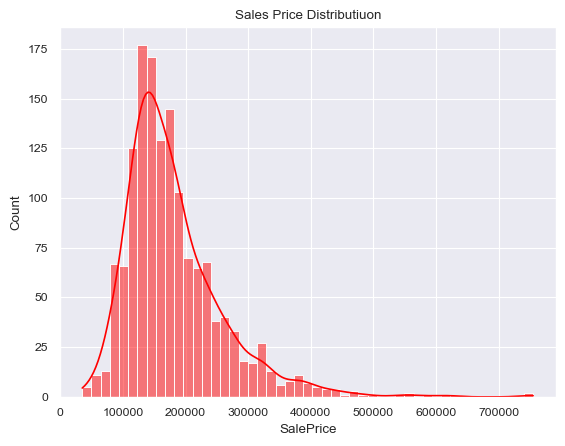

In [202]:
# show the distribution of sales price
sns.histplot(target,x='SalePrice',kde=True,color='red').set_title('Sales Price Distributiuon')
plt.show()

We also want to see what are the correlations between the numerical features and the target variables. Those with high absolute values informs the strong relationship between that feature and the target variable so they should be used in the later prediction model

<Axes: xlabel='correlation', ylabel='None'>

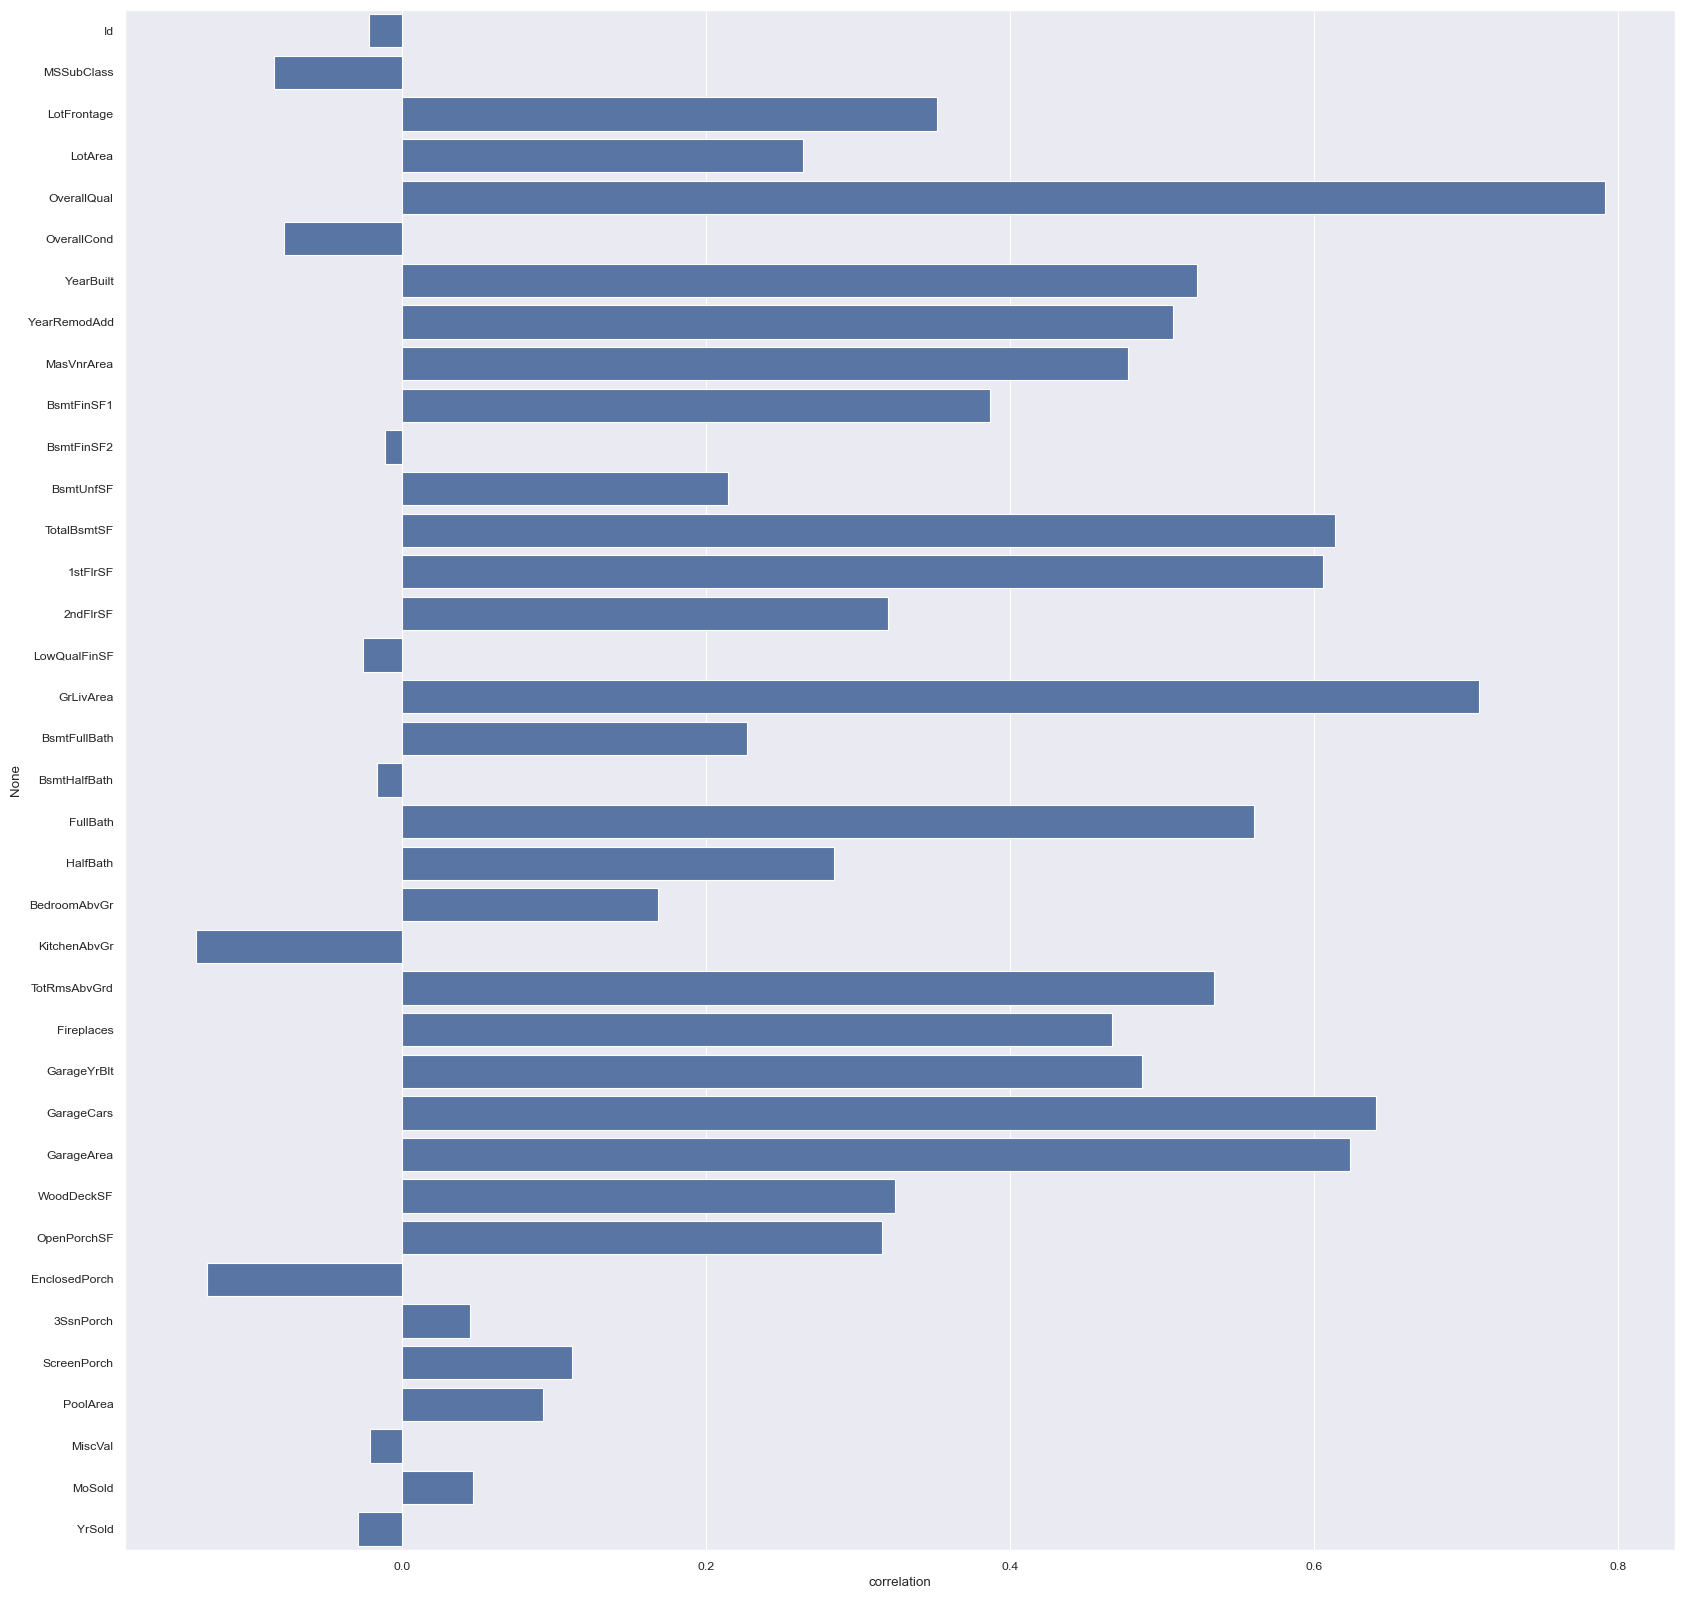

In [203]:
# split the data into categorical and numerical features
categorical_features=data.select_dtypes(include='object')
numerical_features=data.select_dtypes(exclude='object')
corr=pd.DataFrame(numerical_features.drop('SalePrice',axis=1).apply(lambda x:x.corr(numerical_features.SalePrice)))
corr.columns=['correlation']
sns.set_theme('paper')
fig,axis=plt.subplots(figsize=(20,20))
sns.barplot(data=corr,y=corr.index,x=corr.correlation)
#mask = np.triu(np.ones_like(corr, dtype=bool))

We also explore the distribution of these numerical features

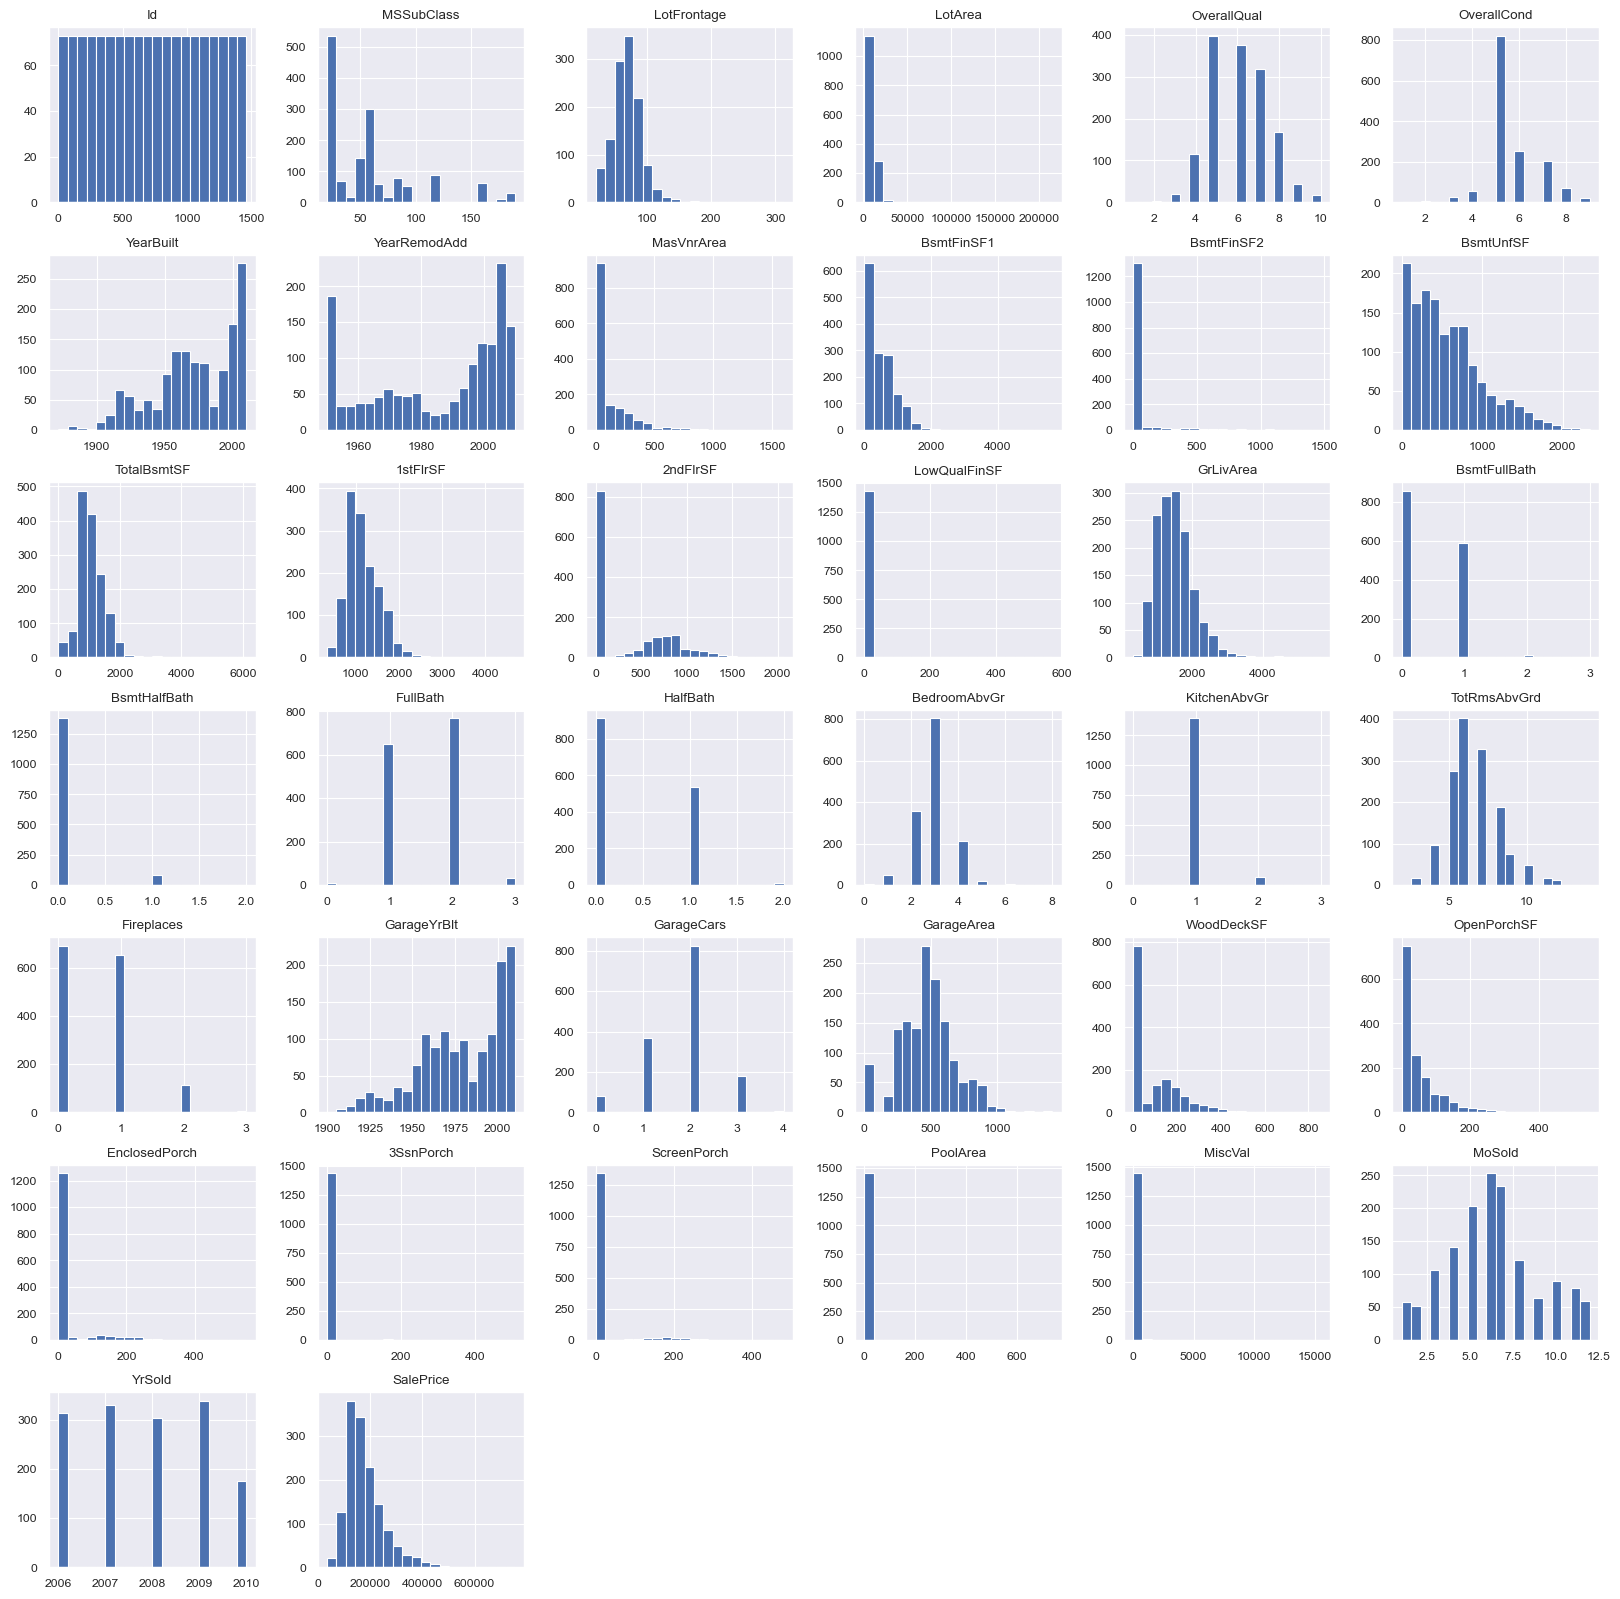

In [204]:
# we can see from the grah above that some of the features are verly weakly correlated with the target variable while some are not
# we then move to the distribution plot of numerical variables
numerical_features.hist(figsize=(20,20),bins=20,color='b')
plt.show()

In [244]:
strong_corr=corr[abs(corr.correlation)>0.5]
strong_corr_name=strong_corr.index

In [245]:
strong_corr_name

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')

We pick those correlations with magnititude greater than 0.5 and use scatter plot to show the relationship with the sale price

d:\code_differientiation\ai_code\Lib\site-packages\seaborn\relational.py:721: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


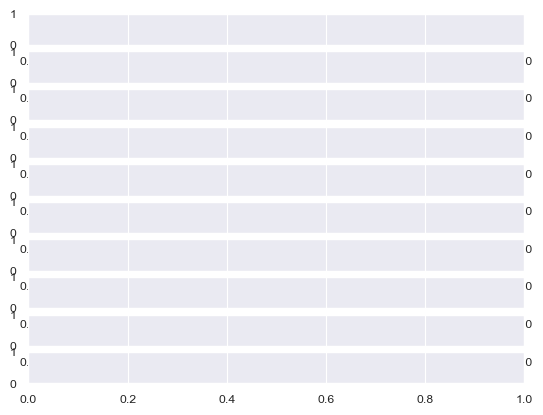

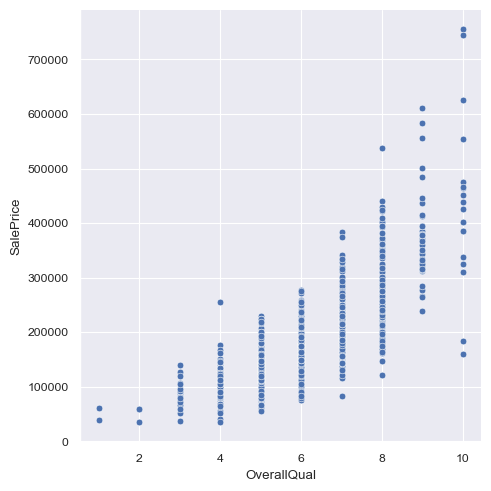

d:\code_differientiation\ai_code\Lib\site-packages\seaborn\relational.py:721: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


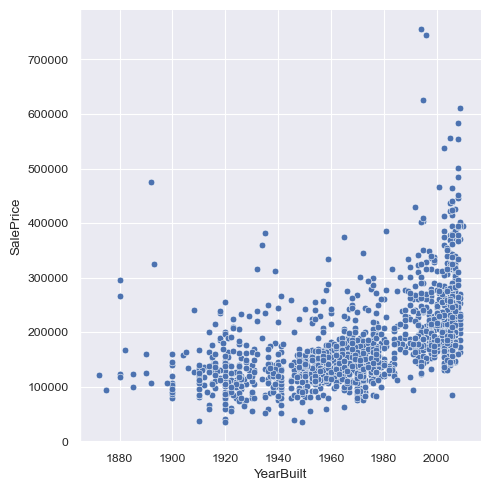

d:\code_differientiation\ai_code\Lib\site-packages\seaborn\relational.py:721: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


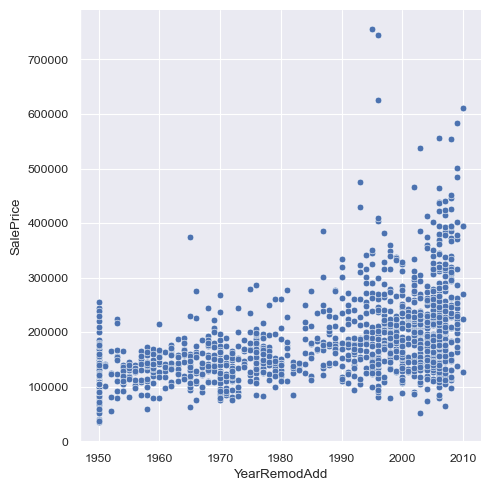

d:\code_differientiation\ai_code\Lib\site-packages\seaborn\relational.py:721: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


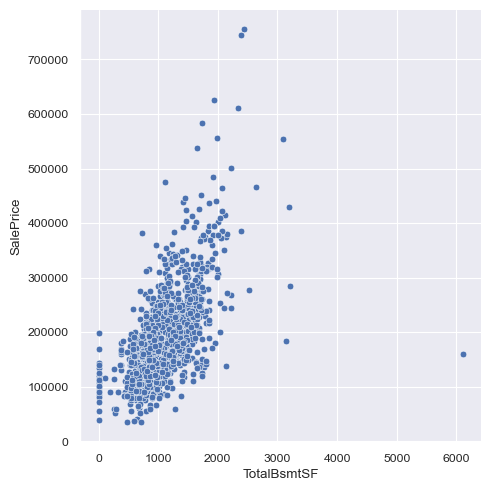

d:\code_differientiation\ai_code\Lib\site-packages\seaborn\relational.py:721: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


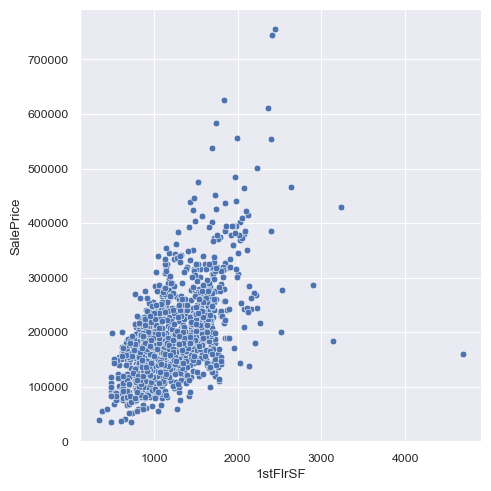

d:\code_differientiation\ai_code\Lib\site-packages\seaborn\relational.py:721: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


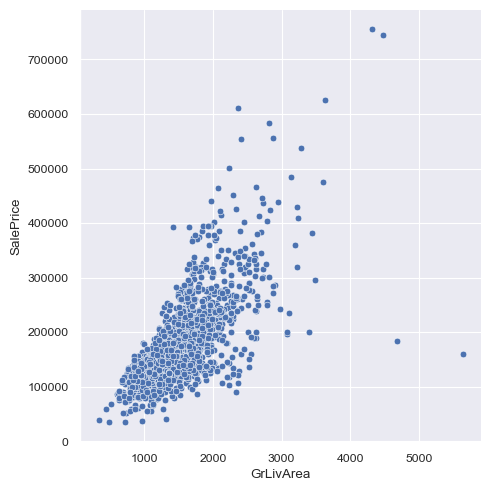

d:\code_differientiation\ai_code\Lib\site-packages\seaborn\relational.py:721: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


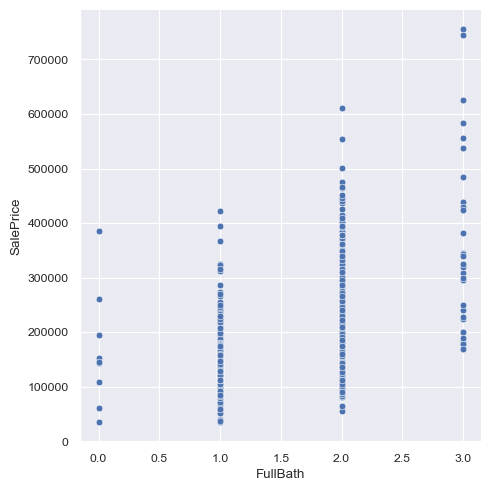

d:\code_differientiation\ai_code\Lib\site-packages\seaborn\relational.py:721: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


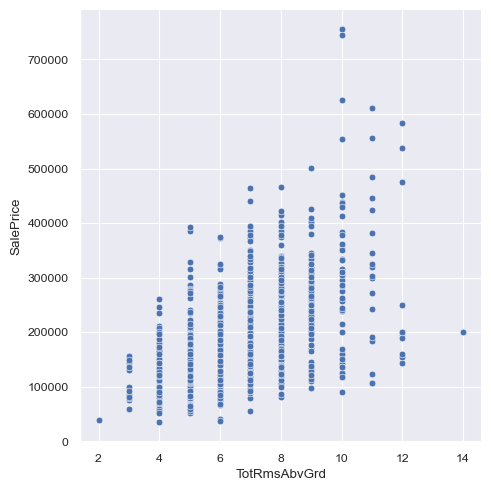

d:\code_differientiation\ai_code\Lib\site-packages\seaborn\relational.py:721: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


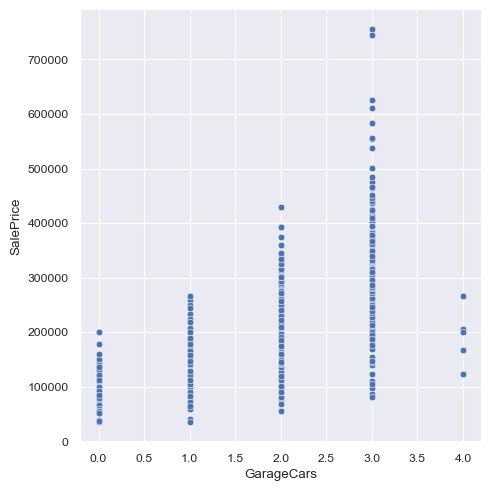

d:\code_differientiation\ai_code\Lib\site-packages\seaborn\relational.py:721: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


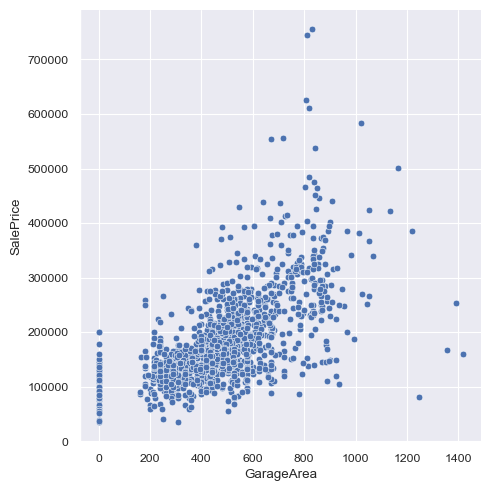

In [246]:
N=len(strong_corr_name)
fig,axis=plt.subplots(N)
for i in range(len(strong_corr_name)):
     #h_indx=i // 4
     #v_index=i % 4
     sns.relplot(data=numerical_features,x=strong_corr_name[i],y='SalePrice',ax=axis[i],kind='scatter')
     plt.show()

we visually insepct the relationship between the salescondition and the sale price

<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

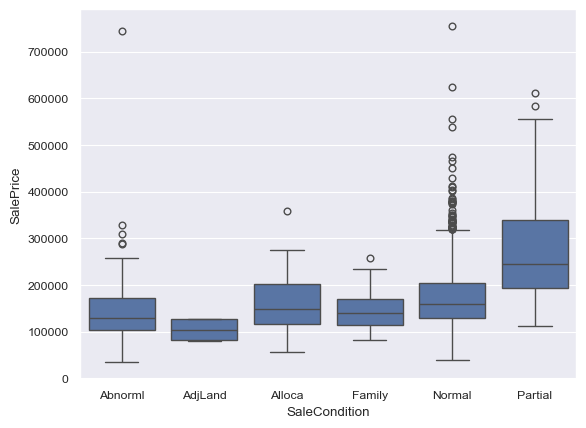

In [248]:
#plot the relationship between SalePrice and SaleCondition
categorical_features=features.select_dtypes(include='category')
sns.boxplot(y=target['SalePrice'],x=categorical_features['SaleCondition'])

New Homes appear to have higher sale price while Abnormal homes have lower sale prices. However, there are few more outliers for the normal sale types



The missing values are dealt with filling 'missing' for the categorical variables and the mean for the numeircal tyeps

In [341]:
# simply fill the missing with the 'missing' in categorical features and the mean for numerical features
# note that the regression model from sklearn can not handle the missing value and hence these values have to be encoded
for column in features.columns:
      if features[column].dtypes=='object':
                features[column]=features[column].fillna('missing')
                test[column]=test[column].fillna('missing')
                data[column]=data[column].astype('category')
                features[column]=features[column].astype('category')
      else:
               features[column]=features[column].fillna(features[column].mean())
               test[column]=test[column].fillna(test[column].mean())

In [342]:
numercial_features=features.select_dtypes(include=['int','float64']).columns
categorical_features=features.select_dtypes(include=['category']).columns

initiate the preprocessor

In [343]:
preprocessor=ColumnTransformer([('one_hot',OneHotEncoder(handle_unknown='ignore'),categorical_features),('scale',MinMaxScaler(),numercial_features)])

We first built the baseline model as linearRegressor

In [344]:
from sklearn.linear_model import LinearRegression
LR=Pipeline([('preprocessing',preprocessor),('regressor',LinearRegression())])
scores=cross_val_score(LR,features,target,scoring='neg_mean_squared_error')
np.sqrt(np.abs(scores)).mean()

35401.465203374144

Import the Ridge model and use GridSearch strategy to fit the model

In [323]:
from sklearn.linear_model import Ridge
params={'regressor__alpha':np.arange(0.01,1,0.01)}
clf=Pipeline(steps=[("preprocessor",preprocessor),('regressor',Ridge())])
#X=data.drop(columns=['SalePrice'])
Y=target
k_fold=KFold(n_splits=5)
#X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=12,shuffle=True)
#parameters={}
#clf.fit(features,target)
clf_search=GridSearchCV(clf,params,cv=k_fold,scoring='neg_mean_squared_error')
clf_search.fit(features,target.values)
#  

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle'...
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             scoring='neg_mean_squared_error')

In [327]:
abs(clf_search.best_score_)**0.5

32899.90555118888

Fitting the model with randomforest, evaluated with cross_validation of 10 folds. We see that the model has higher performance socres than the Ridge Regression

In [328]:
#using RandomForestRegressor and cross_val to evaluate the model performance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf=Pipeline([('preprocessing',preprocessor),('random_forest',RandomForestRegressor(oob_score=True))])
rf_score=cross_val_score(rf,features,target,cv=10,scoring='neg_mean_squared_error')
print(abs(rf_score.mean())**0.5)
#print(rf.oob_score_)

d:\code_differientiation\ai_code\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\code_differientiation\ai_code\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\code_differientiation\ai_code\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\code_differientiation\ai_code\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

29686.953359243627


We look at the out of bag prediction socres for the fitted random_forest, which is very cloe to teh cross validation score

In [329]:
rf.fit(features,target)
rf['random_forest'].oob_score_

d:\code_differientiation\ai_code\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8504803109497019

We also fit the model with the boosting method


In [332]:
from sklearn.ensemble import GradientBoostingRegressor
GB=Pipeline([('preprocessor',preprocessor),('GB',GradientBoostingRegressor())])
val_scores=cross_val_score(GB,features,target,scoring='neg_mean_squared_error')
print(np.sqrt(np.abs(val_scores)).mean())

d:\code_differientiation\ai_code\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\code_differientiation\ai_code\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\code_differientiation\ai_code\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\code_differientiation\ai_code\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

26633.95737442863


The GradientBoosting Regressor seems perform better than the random forest

we can also do with 

In [335]:
from sklearn.preprocessing import OrdinalEncoder
features=data.drop(['Id','SalePrice'],axis=1)
features[features.select_dtypes(include='object').columns]=features[features.select_dtypes(include='object').columns].astype('category')
preprocessor=ColumnTransformer([('categorical_encoder',OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),features.select_dtypes(include='category').columns),('scaler',MinMaxScaler(),features.select_dtypes(exclude='category').columns)])

In [337]:
from sklearn.ensemble import  HistGradientBoostingRegressor
#from sklearn.preprocessing import OrdinalEncoder
GB=Pipeline([('preprocessor',preprocessor),('GB', HistGradientBoostingRegressor())])
#GB=HistGradientBoostingRegressor(categorical_features=features.select_dtypes(include='category').columns).set_output(transform="pandas")
val_scores=cross_val_score(GB,features,target,scoring='neg_mean_squared_error')
print(np.sqrt(np.abs(val_scores)).mean())

d:\code_differientiation\ai_code\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\code_differientiation\ai_code\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\code_differientiation\ai_code\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\code_differientiation\ai_code\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

28283.649555090677


In [262]:
predictions=pd.DataFrame(clf_search.predict(test))
predictions.index.name='Id'
predictions.columns=['SalePrice']
#predictions.reset_index(inplace=True)
predictions.to_csv('prediction.csv')